# Face Recognition con ArcFace

Deng, J., Guo, J., Xue, N., & Zafeiriou, S. (2019). [Arcface: Additive angular margin loss for deep face recognition](https://openaccess.thecvf.com/content_CVPR_2019/papers/Deng_ArcFace_Additive_Angular_Margin_Loss_for_Deep_Face_Recognition_CVPR_2019_paper.pdf). In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (pp. 4690-4699).



## Librería ArcFace

In [ ]:
!pip install arcface

     |████████████████████████████████| 62 kB 805 kB/s 
     |████████████████████████████████| 596 kB 29.1 MB/s 
     |████████████████████████████████| 49.9 MB 17 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have

## Imágenes de prueba

Las caras A y B son de la misma persona, la cara C es de otra persona

In [ ]:

!unzip facesABC.zip

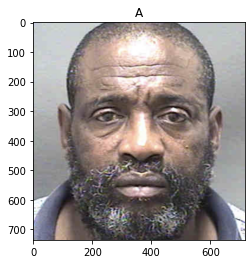

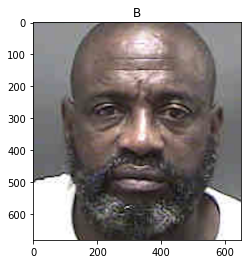

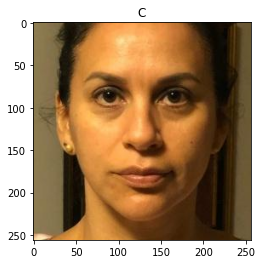

In [ ]:
import cv2
import matplotlib.pyplot as plt


A = cv2.imread('faceA.png')
B = cv2.imread('faceB.png')
C = cv2.imread('faceC.jpg')

plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB))
plt.title('A')
plt.show()
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB))
plt.title('B')
plt.show()
plt.imshow(cv2.cvtColor(C, cv2.COLOR_BGR2RGB))
plt.title('C')
plt.show()


## Cómputo de Embeddings

In [ ]:
from arcface import ArcFace

In [ ]:
arcface    = ArcFace.ArcFace()

xA = arcface.calc_emb(A)
xB = arcface.calc_emb(B)
xC = arcface.calc_emb(C)


## Cómputo de Score usando producto punto

In [ ]:
import numpy as np

In [ ]:
dAB = np.dot(xA,xB)
print('score(A,B) = ',dAB)

dAC = np.dot(xA,xC)
print('score(A,C) = ',dAC)

dBC = np.dot(xB,xC)
print('score(B,C) = ',dBC)

score(A,B) =  0.8539442
score(A,C) =  0.13831374
score(B,C) =  0.19748917


## Matching

Si un score es mayore a un umbral (por ejemplo 0.45) se dice que las caras pertenecen a la misma persona

In [ ]:
th = 0.45

if dAB>th:
  print('match(A,B): same person')
else:
  print('match(A,B): different persons')


if dAC>th:
  print('match(A,C): same person')
else:
  print('match(A,C): different persons')


if dBC>th:
  print('match(B,C): same person')
else:
  print('match(B,C): different persons')



match(A,B): same person
match(A,C): different persons
match(B,C): different persons
